In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import bokeh.models as bm
import bokeh.plotting as pl
from bokeh.io import output_notebook
from bokeh.palettes import Category10_10
# Read the CSV file with counts
df = pd.read_csv('unique_words_HI.csv')


# Hindi

## Tone

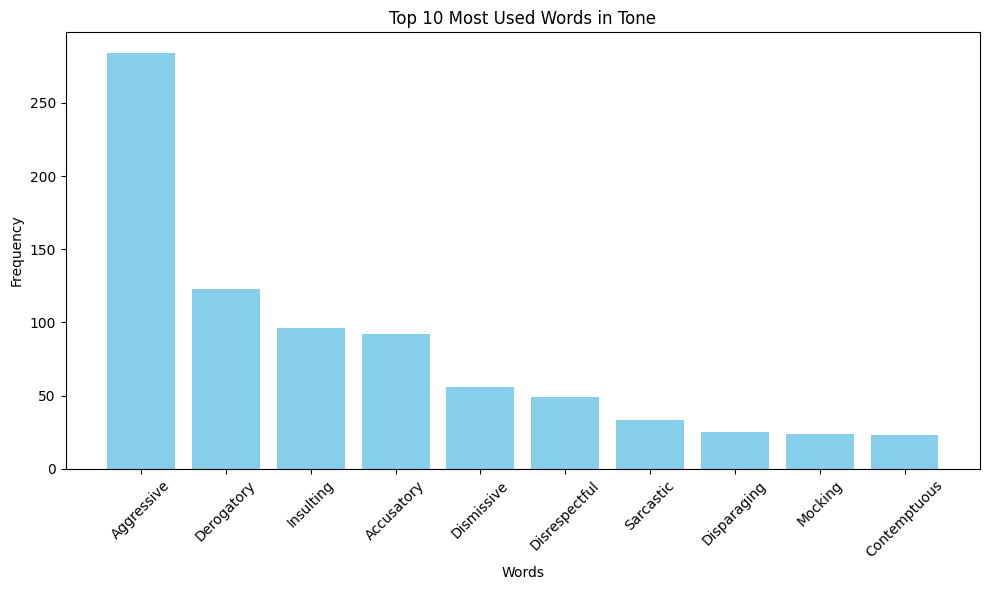

            Tone  Tone appears
0     Aggressive         284.0
1     Derogatory         123.0
2      Insulting          96.0
3     Accusatory          92.0
4     Dismissive          56.0
5  Disrespectful          49.0
6      Sarcastic          33.0
7    Disparaging          25.0
8        Mocking          24.0
9   Contemptuous          23.0


In [9]:
# Plot histogram for the 'Tone' column
tone_df = df[['Tone', 'Tone appears']].sort_values(by='Tone appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(tone_df['Tone'], tone_df['Tone appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Tone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(tone_df)

## Language

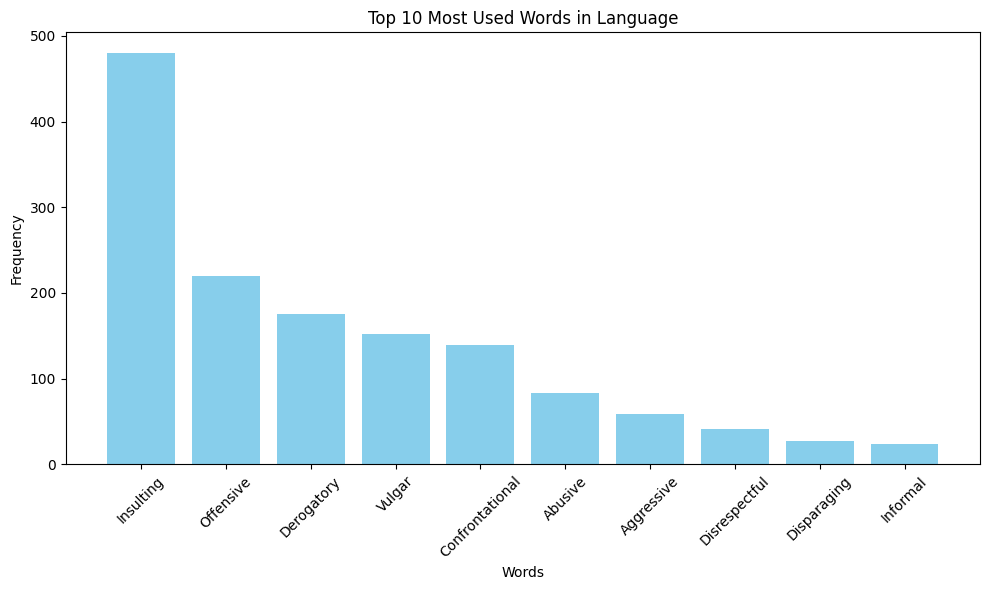

          Language  Language appears
0        Insulting             480.0
1        Offensive             220.0
2       Derogatory             176.0
3           Vulgar             152.0
4  Confrontational             139.0
5          Abusive              83.0
6       Aggressive              59.0
7    Disrespectful              41.0
8      Disparaging              27.0
9         Informal              24.0


In [10]:
# Plot histogram for the 'Language' column
language_df = df[['Language', 'Language appears']].sort_values(by='Language appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(language_df['Language'], language_df['Language appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(language_df)

## Sentiment

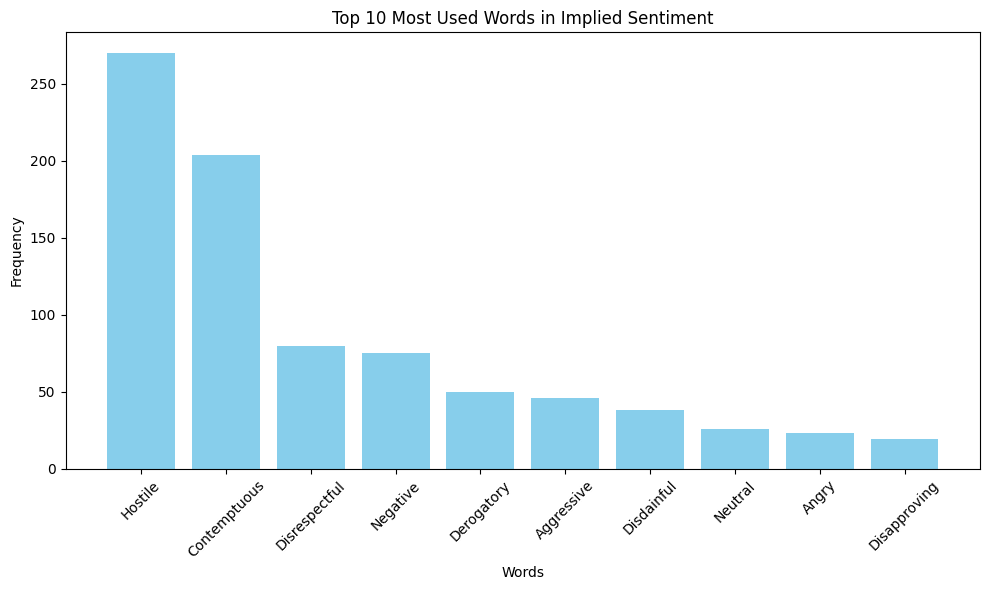

  Implied Sentiment  Implied Sentiment appears
0           Hostile                      270.0
1      Contemptuous                      204.0
2     Disrespectful                       80.0
3          Negative                       75.0
4        Derogatory                       50.0
5        Aggressive                       46.0
6        Disdainful                       38.0
7           Neutral                       26.0
8             Angry                       23.0
9      Disapproving                       19.0


In [11]:
# Plot histogram for the 'Implied Sentiment' column
implied_sentiment_df = df[['Implied Sentiment', 'Implied Sentiment appears']].sort_values(by='Implied Sentiment appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(implied_sentiment_df['Implied Sentiment'], implied_sentiment_df['Implied Sentiment appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Implied Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(implied_sentiment_df)

## All together

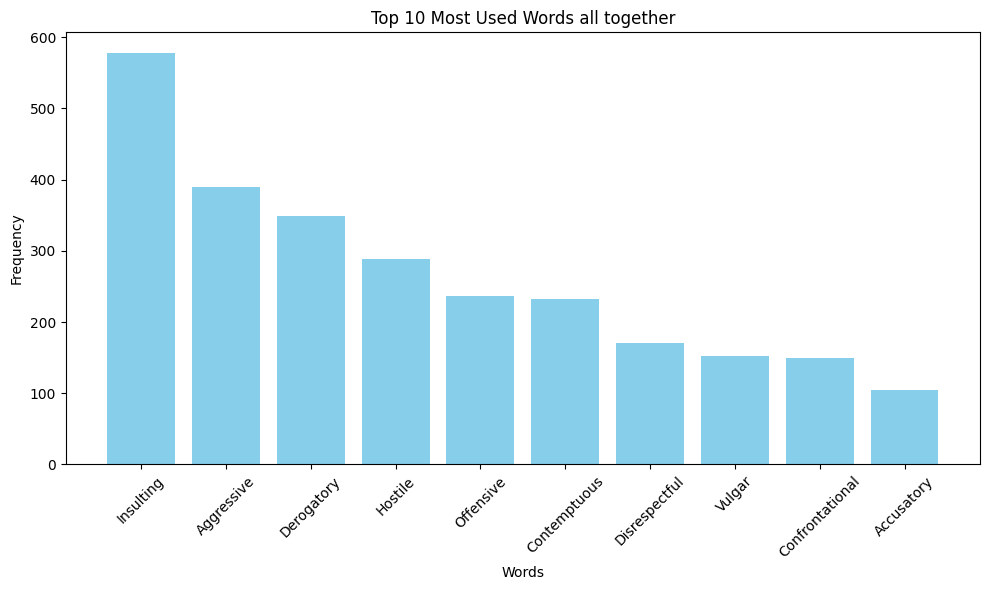

           combine  combine appears
0        Insulting            578.0
1       Aggressive            389.0
2       Derogatory            349.0
3          Hostile            289.0
4        Offensive            236.0
5     Contemptuous            232.0
6    Disrespectful            170.0
7           Vulgar            153.0
8  Confrontational            150.0
9       Accusatory            104.0


In [12]:
# Plot histogram for the 'Combine' column
implied_sentiment_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(implied_sentiment_df['combine'], implied_sentiment_df['combine appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words all together')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(implied_sentiment_df)

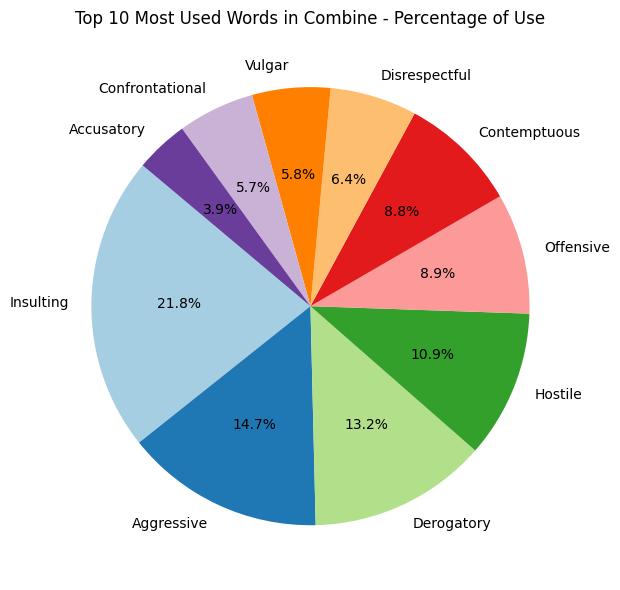

In [13]:
total_sentences = 1000

# Get the top 10 most used words from the 'combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)

# Calculate the percentage of use for each word
combine_df['percentage'] = (combine_df['combine appears'] / total_sentences) * 100

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(combine_df['percentage'], labels=combine_df['combine'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Most Used Words in Combine - Percentage of Use')
plt.tight_layout()
plt.show()

## Toxic Words

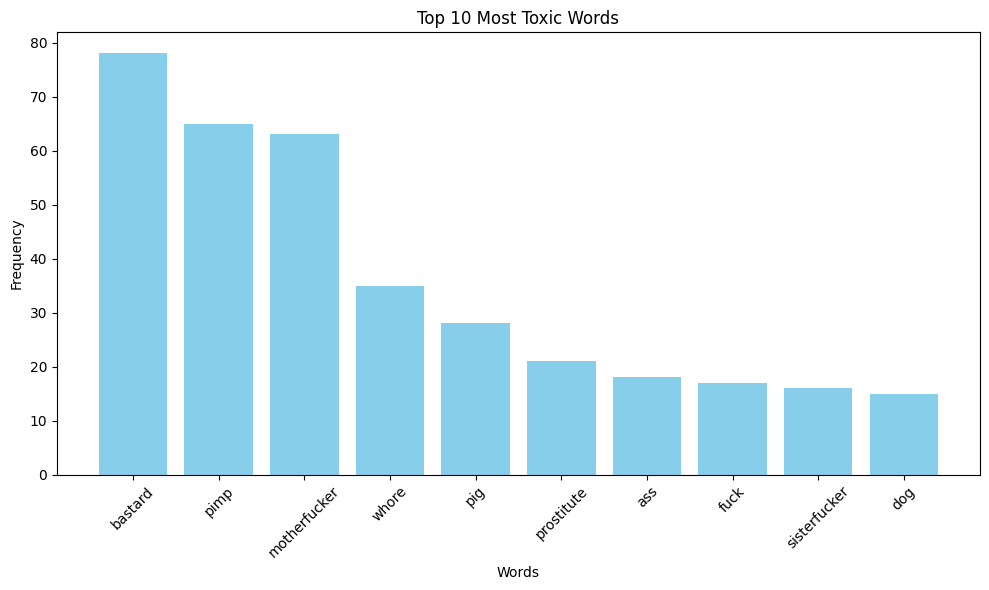

  uniq sequences  number appears
0        bastard              78
1           pimp              65
2   motherfucker              63
3          whore              35
4            pig              28
5     prostitute              21
6            ass              18
7           fuck              17
8   sisterfucker              16
9            dog              15


In [14]:
df_t = pd.read_csv('600-test/HI-toxic.csv')
df_toxic = df_t[['uniq sequences', 'number appears']].sort_values(by='number appears', ascending=False).head(10).reset_index(drop=True)
df_toxic['uniq sequences'] = df_toxic['uniq sequences'].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(df_toxic['uniq sequences'], df_toxic['number appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Toxic Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(df_toxic)

## Clustering With Tone Presentation

In [19]:

# Read the CSV file into a Pandas DataFrame
file_path = 'HI-analyze-cluster.csv'
df = pd.read_csv(file_path)

# Extract the Keyword Vector column
keyword_vectors = np.array(df['Keyword Vector'].apply(eval).tolist())

# Compute PCA to reduce the dimensionality of the Keyword Vector
keyword_vectors_pca = PCA(n_components=2).fit_transform(keyword_vectors)

# Normalize vectors to have zero mean and unit variance
keyword_vectors_pca = StandardScaler().fit_transform(keyword_vectors_pca)

# Initialize Bokeh for notebook output
output_notebook()

# Function to draw interactive plot for data points with auxiliary info on hover
def draw_vectors(x, y, phrases, cluster_labels, radius=10, alpha=0.6, width=600, height=400, max_sentence_length=70, show=True, **kwargs):
    # Truncate sentences that are too long
    truncated_phrases = [phrase[:max_sentence_length] + '...' if len(phrase) > max_sentence_length else phrase for phrase in phrases]
    colors = [Category10_10[i] for i in cluster_labels]
    data_source = bm.ColumnDataSource({"x": x, "y": y, "phrases": truncated_phrases, "color": colors, **kwargs})
    fig = pl.figure(active_scroll="wheel_zoom", width=width, height=height)
    scatter = fig.scatter("x", "y", size=radius, color="color", alpha=alpha, source=data_source)
    hover_tool = bm.HoverTool(tooltips=[("Phrase", "@phrases")] + [(key, "@" + key) for key in kwargs.keys()], mode="mouse")
    fig.add_tools(hover_tool)
    if show:
        pl.show(fig)
    return fig

# Plotting the phrases in 2D space
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Tone'].tolist(), df['K_means_cluster'].tolist())


Loading BokehJS ...

figure(id='p1151', ...)

## Clustering With Language Presentation

In [20]:
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Language'].tolist(), df['K_means_cluster'].tolist())

figure(id='p1200', ...)

## Clustering With Sentiment Presentation

In [21]:
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Implied Sentiment'].tolist(), df['K_means_cluster'].tolist())

figure(id='p1249', ...)